<center><h1><b>Audio Data Classification</b></h1></center>

----------------------------------------------------------------

## 1) Imports

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

## 2) Data Loading

### 2.1) Defining File Path

In [65]:
# data_location = r"D:\Datasets\Dataset_4_Audio_Classification\Bird_Sounds"
data_location = r"C:\Datasets\Capuchin_Bird_Sounds"

In [66]:
CAPUCHIN_FILE = os.path.join(data_location, 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join(data_location, 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

print(CAPUCHIN_FILE)
print(NOT_CAPUCHIN_FILE)

C:\Datasets\Capuchin_Bird_Sounds\Parsed_Capuchinbird_Clips\XC3776-3.wav
C:\Datasets\Capuchin_Bird_Sounds\Parsed_Not_Capuchinbird_Clips\afternoon-birds-song-in-forest-0.wav


### 2.2) Building the Data Loader Function

In [67]:

def load_wav_16k_mono(filename):
    """
        
        This function is going to process the audio file and 
        convert it to 16K hertz and then returns a single channel (mono).
    """

    # Load encoded wav file
    file_contents = tf.io.read_file(filename)

    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    
    # Casts the datatype to int32
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    
    # Resamples the audio to 16 hertz. (44100 Hz to 16000 Hz)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)

    return wav

In [68]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

print(wave, nwave)

tf.Tensor(
[ 8.9910554e-07 -2.7947258e-06  7.0741157e-06 ... -1.0823049e-02
 -3.5766482e-03  1.5143131e-02], shape=(48000,), dtype=float32) tf.Tensor(
[ 0.          0.          0.         ... -0.00054067  0.02472705
 -0.00794304], shape=(48927,), dtype=float32)


### 2.3) Plot Waveform

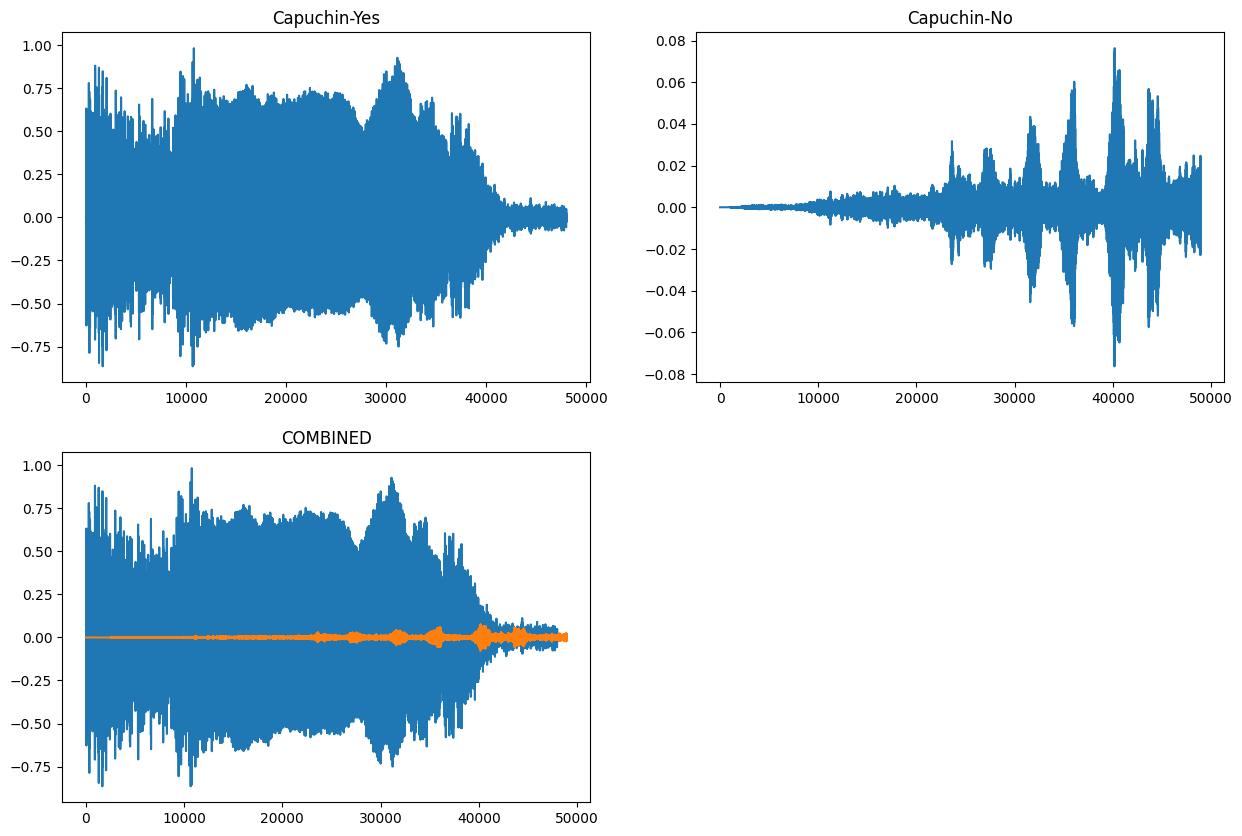

In [69]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(wave)
plt.title("Capuchin-Yes")

plt.subplot(2,2,2)  
plt.plot(nwave)
plt.title("Capuchin-No")

plt.subplot(2,2,3)  
plt.plot(wave)
plt.plot(nwave)
plt.title("COMBINED")

plt.show()

## 3) Create Tensorflow Dataset

### 3.1) Define paths to Negative and Positive Data

In [70]:
POS = os.path.join(data_location, 'Parsed_Capuchinbird_Clips')
NEG = os.path.join(data_location, 'Parsed_Not_Capuchinbird_Clips')

### 3.2) Create TensorFlow Datsets

In [71]:
pos = tf.data.Dataset.list_files(POS+'\*.wav')
neg = tf.data.Dataset.list_files(NEG+'\*.wav')

In [72]:
pos.as_numpy_iterator().next()

b'C:\\Datasets\\Capuchin_Bird_Sounds\\Parsed_Capuchinbird_Clips\\XC433953-8.wav'

### 3.3) Add labels and combine positive and negative samples

In [73]:
# Adding labels to data
# This separates the Capuchin-bird sounds from not Capuchin-bird sounds.
# ----------------------------------------------------------------
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

data = positives.concatenate(negatives)
data

<ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [74]:
positives.as_numpy_iterator().next()

(b'C:\\Datasets\\Capuchin_Bird_Sounds\\Parsed_Capuchinbird_Clips\\XC456314-0.wav',
 1.0)

In [75]:
data.as_numpy_iterator().next()

(b'C:\\Datasets\\Capuchin_Bird_Sounds\\Parsed_Capuchinbird_Clips\\XC388470-6.wav',
 1.0)

In [76]:
## 4) Determine average length of Capuchin Call

### 4.1) Calculate Wave Cycle length

lengths = []

file_path_1 = os.path.join(data_location,'Parsed_Capuchinbird_clips')
for file in os.listdir(file_path_1):
    tensor_wave = load_wav_16k_mono(os.path.join(file_path_1,file))
    lengths.append(len(tensor_wave))

In [77]:
print(lengths)

[40000, 48000, 56000, 48000, 56000, 64000, 64000, 64000, 56000, 56000, 48000, 56000, 64000, 56000, 40000, 64000, 64000, 64000, 64000, 56000, 56000, 56000, 56000, 48000, 48000, 56000, 56000, 64000, 64000, 48000, 56000, 64000, 56000, 64000, 32000, 40000, 48000, 40000, 56000, 56000, 56000, 56000, 48000, 48000, 64000, 64000, 48000, 64000, 48000, 48000, 40000, 48000, 48000, 56000, 56000, 48000, 40000, 56000, 48000, 40000, 56000, 48000, 48000, 56000, 48000, 64000, 64000, 40000, 40000, 72000, 56000, 56000, 56000, 64000, 56000, 64000, 64000, 56000, 56000, 56000, 48000, 48000, 48000, 56000, 56000, 56000, 48000, 56000, 56000, 56000, 48000, 56000, 40000, 64000, 56000, 56000, 40000, 64000, 56000, 64000, 48000, 64000, 56000, 48000, 48000, 48000, 64000, 64000, 64000, 48000, 48000, 56000, 48000, 64000, 48000, 64000, 56000, 56000, 56000, 48000, 56000, 56000, 40000, 48000, 48000, 32000, 48000, 40000, 64000, 56000, 32000, 40000, 40000, 48000, 48000, 48000, 64000, 56000, 55999, 48000, 55999, 48000, 48000

In [78]:
### 4.2) Calculate Mean, Min and Max
tf.math.reduce_mean(lengths)
tf.math.reduce_min(lengths)
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [79]:
## 5) Build pre-processing function to convert to spectrogram

In [80]:
### 5.1) Build pre-processing function

In [81]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav),
                            dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [82]:
### 5.2) Testing out the function and visualizing the Spectrogram

In [83]:
filepath, label = positives.shuffle(buffer_size=1000).as_numpy_iterator().next()

In [84]:
filepath

b'C:\\Datasets\\Capuchin_Bird_Sounds\\Parsed_Capuchinbird_Clips\\XC27881-2.wav'

In [85]:
spectrogram, label = preprocess(filepath, label)

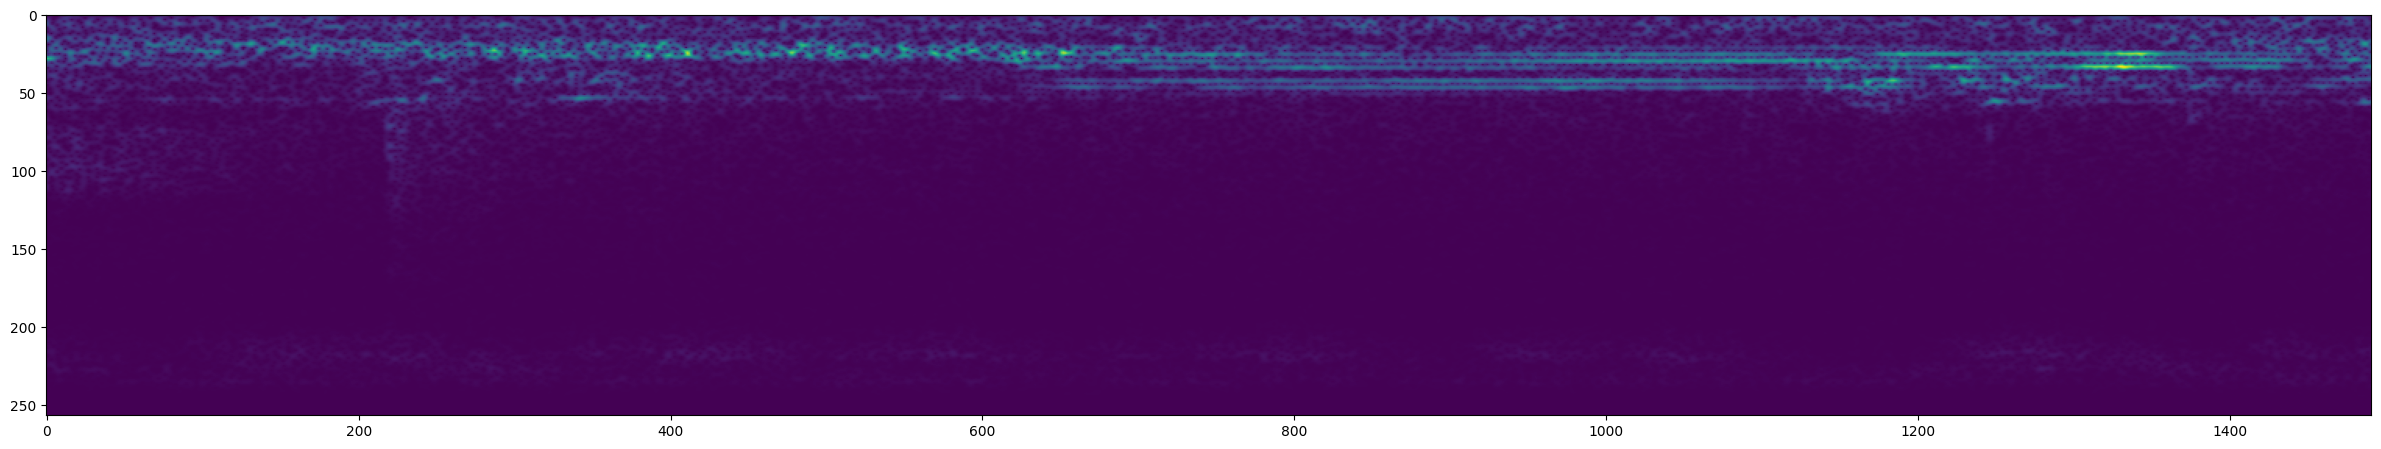

In [86]:
# Plotting the Spectrogram
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()